# Application: Exploring Handwritten Digits

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
digits = load_digits()

In [3]:
digits.images.shape

(1797, 8, 8)

In [13]:
digits.target[0]

0

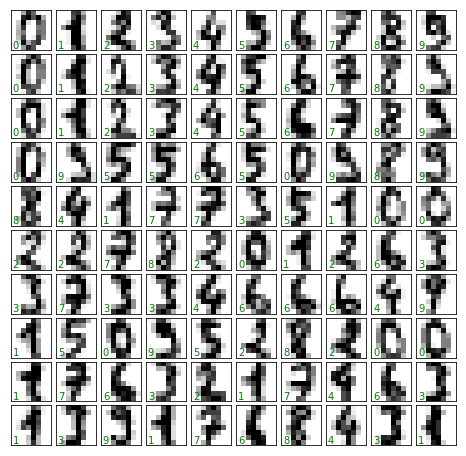

In [16]:
# Visualize the first hundred digits with matplotlib. No ticks shown, and make each graph spaced 0.1 apart.

# Make a figure and axes with the correct parameters.
fig, axes = plt.subplots(10, 10, figsize=(8,8), subplot_kw=dict(xticks=[], yticks=[]),
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

# Plot the numbers into each axes.
for i, ax in enumerate(axes.flat):
    # show images
    ax.imshow(digits.images[i], cmap='binary')
    # give text that says what number each image is
    ax.text(.05, .05, digits.target[i], transform=ax.transAxes, color='green')

In [23]:
digits.data.shape

(1797, 64)

In [22]:
# Make a features matrix and a target vector
Xdigits = digits.data
ydigits = digits.target

## Dimensionality Reduction

In [ ]:
# Is dimensionality reduction supervised or unsupervised?

# unsupervised

In [27]:
# Transform data to two dimensions using the isomap algorithm. Save projected data into data_projected.
from sklearn.manifold import Isomap
model = Isomap()
model.fit(Xdigits, ydigits)
data_projected = model.transform(Xdigits)

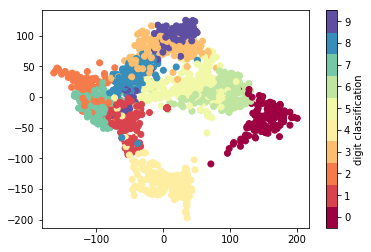

In [38]:
# Make a scatterplot of the two features of data_projected. Color it by target, give it a spectral colormap grabbed from the colormap module of plt.
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
           cmap=plt.cm.get_cmap('Spectral', 10));

plt.colorbar(label='digit classification', ticks=range(10));
plt.clim(-0.5, 9.5)

## Classification on digits

In [40]:
# Grab train_test_split, split up data into groups
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(Xdigits, ydigits, random_state=0)

In [47]:
# Make a naive bayes model, use it to classify digits
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain, ytrain)

y_model = model.predict(Xtest)

In [49]:
# Gauge accuracy of model using the accuracy_score function
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)

0.83333333333333337

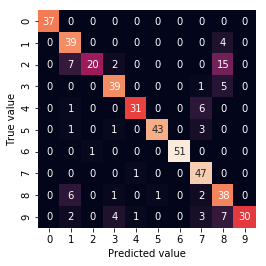

In [89]:
# Figure out where we've gone wrong with a confusion matrix plotted in Seaborn
from sklearn.metrics import confusion_matrix

# Make the confusion matrix
mat = confusion_matrix(ytest, y_model)

# Plot it using a heatmap
sns.heatmap(mat, square=True, annot=True, cbar=False);
plt.xlabel('Predicted value');
plt.ylabel('True value');

- 8 and 2 
- 4 and 7
- 8 and 1
- 3 and 8

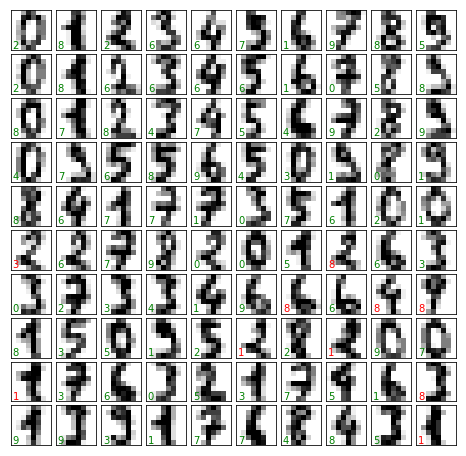

In [98]:
# Plot inputs again, but use green for correct labels and red for incorrect labels

# Make subplots


# Stick numbers on them
